# Hausing prices predict

Coeficientes:
Area: 10980.894958412717
No. of Bedrooms: -1635222.8229559422
Resale: 1250544.313341971
MaintenanceStaff: -829609.7512986605
Gymnasium: 683188.9262122291
Intercepto: -4364148.586352266
R²: 0.7074064411350629
RMSE: 4295048.262969036


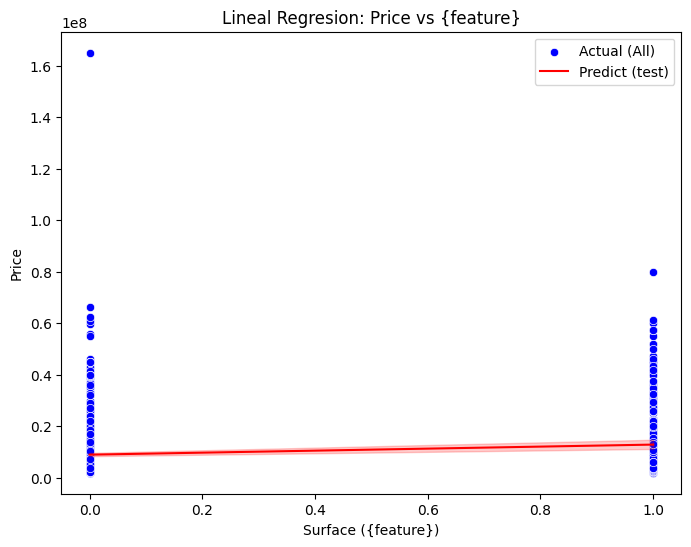

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv('../../../datasets/raw/Hyderabad.csv')

# Visualizar las primeras filas
# print(df.head())

# Verificar columnas disponibles
#print(df.columns)

# Eliminar filas con valores nulos
df = df.dropna()

# Ajusta los nombres de columnas según tu dataset
X = df[['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium']]
y = df['Price']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar modelo
# Coeficientes
print("Coeficientes:")
print("=====================================")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef}")

print("=====================================")
print(f"Intercepto: {model.intercept_}")

print("=====================================")
print(f"R²: {r2_score(y_test, y_pred)}")

print("=====================================")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

feature = 'Resale'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[feature], y=y, color='blue', label='Actual (All)')
sns.lineplot(x=X_test[feature], y=y_pred, color='red', label='Predict (test)')
plt.xlabel("Surface ({feature})")
plt.ylabel('Price')
plt.title("Lineal Regresion: Price vs {feature}")
plt.legend()
plt.show()